## **COMPUTER VISION - PROJECT 2 - Ms.Dipali Jain (JUNE 2021)**

# **PART 1 - PROJECT BASED** (30 Marks)

**• DOMAIN:** Entertainment

**• CONTEXT:** 

Company X owns a movie application and repository which caters movie streaming to millions of users who on subscription basis.
Company wants to automate the process of cast and crew information in each scene from a movie such that when a user pauses on the movie and clicks on cast information button, the app will show details of the actor in the scene. Company has an in-house computer vision and multimedia experts who need to detect faces from screen shots from the movie scene.

**• DATA DESCRIPTION:** 

The dataset comprises of images and its mask where there is a human face.


**• PROJECT OBJECTIVE**: 

Face detection from training images.

## **Steps and tasks::** [ Total Score: 30 points]

1. Import the dataset.
2. Create features (images) and labels (mask) using that data.
3. Mask detection model:

  ● Design a face mask detection model.

  Hint: Use U-net along with pre-trained transfer learning models

  ● Design your own Dice Coe"icient and Loss function.

  ● Train, tune and test the model.

  ● Evaluate the model using testing data.
  
4. Use the “Prediction image” as an input to your designed model and display the output of the image.

**Mount drive for importing data files**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [2]:
# Import all the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import tensorflow as tf 
import os

import warnings
warnings.filterwarnings('ignore')

## **1. Import the Dataset**

**Let's define the path to read the images from training dataset.**

**Read npy file using numpy library load method**

In [3]:
project_path = "/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT 2/Part 1- Train data - images.npy"

In [4]:
Train_data = np.load(project_path, mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')

### **Let's explore some information about data** 

In [5]:
Train_data.shape

(409, 2)

The training data consists of 2 columns. First column consists of 409 images.

**Let's explore the size of image from first column**

In [6]:
Train_data[0][0].shape

(333, 650, 3)

**Image is of size 333 by 650 and of 3 channels i.e. RGB image.**

In [7]:
Train_data[201][0]

array([[[117, 131,  96],
        [123, 137, 104],
        [125, 138, 108],
        ...,
        [ 76,  83,  49],
        [ 83,  90,  57],
        [ 93, 104,  72]],

       [[119, 133,  98],
        [123, 137, 104],
        [124, 138, 105],
        ...,
        [ 73,  80,  47],
        [ 87,  94,  63],
        [101, 112,  82]],

       [[122, 136, 101],
        [120, 134,  99],
        [124, 138, 105],
        ...,
        [ 76,  83,  52],
        [ 96, 105,  76],
        [114, 124,  97]],

       ...,

       [[ 55,  44,  22],
        [ 58,  47,  27],
        [ 59,  51,  30],
        ...,
        [ 39,  20,  16],
        [ 39,  19,  18],
        [ 42,  21,  20]],

       [[ 58,  47,  25],
        [ 59,  48,  28],
        [ 57,  49,  30],
        ...,
        [ 42,  23,  17],
        [ 42,  21,  18],
        [ 45,  24,  21]],

       [[ 70,  59,  39],
        [ 65,  57,  36],
        [ 62,  54,  35],
        ...,
        [ 44,  25,  18],
        [ 44,  23,  18],
        [ 46,  25,  20]]

We can see that the images are stored in the form of array, each element represents the pixel value of the image.

In [8]:
Train_data[100][1]

[{'imageHeight': 720,
  'imageWidth': 1280,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.26327193932827736, 'y': 0.18497109826589594},
   {'x': 0.3206933911159263, 'y': 0.28516377649325625}]},
 {'imageHeight': 720,
  'imageWidth': 1280,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.4257854821235103, 'y': 0.23121387283236994},
   {'x': 0.49837486457204766, 'y': 0.34104046242774566}]},
 {'imageHeight': 720,
  'imageWidth': 1280,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.6197183098591549, 'y': 0.29865125240847784},
   {'x': 0.6988082340195017, 'y': 0.4624277456647399}]}]

The second column consists of information about label.
It contains the size of the image (height and width), label, notes which could be the description of the image, and points which contains the x and y coordinates  of faces in the image.

### **Let's segregate the data as images and masks and also display a sample image and it's corresponding mask.**

In [9]:
images = Train_data[:,0]
mask = Train_data[:,1]
print(images.shape, mask.shape)

(409,) (409,)


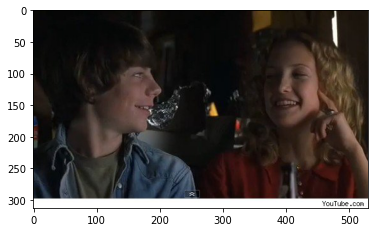

In [10]:
plt.imshow(images[200])

In [11]:
display(mask[200])

[{'imageHeight': 313,
  'imageWidth': 530,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.12075471698113208, 'y': 0.09904153354632587},
   {'x': 0.3905660377358491, 'y': 0.6517571884984026}]},
 {'imageHeight': 313,
  'imageWidth': 530,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.6622641509433962, 'y': 0.0670926517571885},
   {'x': 0.8849056603773585, 'y': 0.6006389776357828}]}]

**Let's check size of some sample images to determine if the images are of same size.**

In [12]:
from PIL import Image as im

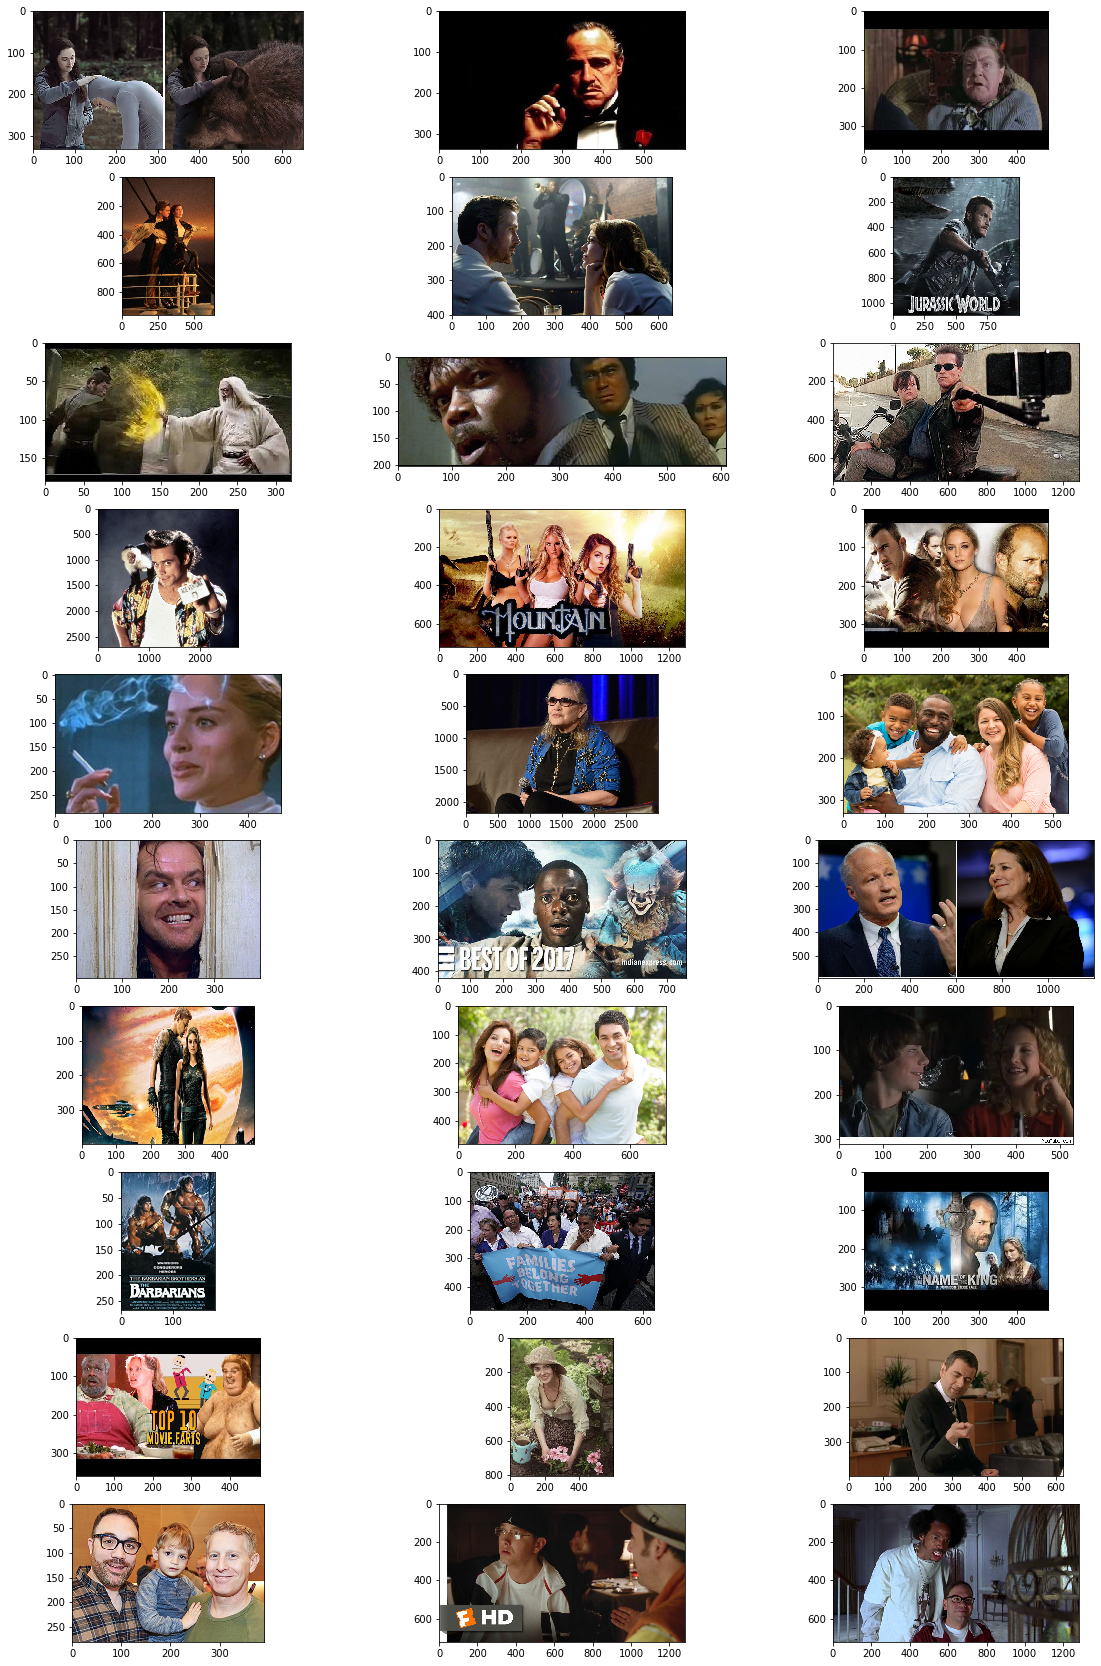

In [13]:
fi,ax = plt.subplots(10,3,figsize=(20,30))
row = 0
col = 0
index = 0
for i in range(30):
  ax[row][col].imshow(Train_data[index][0], interpolation='nearest')
  index = index + 10
  col = col + 1
  if col > 2:
    row = row + 1
    col = 0
plt.show()

* It can be observed that images are of different sizes and most of the images are color images.

* Let's resize and preprocess the images.

In [14]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

## **2. Create features (images) and labels (mask) using that data.**

In [15]:
# Create an empty array for storing mask and image details.

mask_label = np.zeros((int(Train_data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
x_train = np.zeros((int(Train_data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
print("x_train_shape:", x_train.shape)


x_train_shape: (409, 224, 224, 3)


**IMAGE PREPROCESSING**

It is important to preprocess the images before we use them to train the model. We will resize all the images to equal width and height as 224.  We'll create the features and target to train the model. The features are the images and the target is the coordinates of faces. In the next step, we will save all the preprocessed images in 'X' array of height and width as 224.  We will first initialize the X array with zeroes. The (x,y) coordinates will be saved in 'masks' array. 

We'll perform the following tasks:

* resize the images to equal width and height

* convert grayscale images (if any) to colored

* use preprocess_input module from tensorflow.keras.applications.mobilenet library

In [16]:
import cv2
from google.colab.patches import cv2_imshow

In [17]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.8.0'

In [18]:
from tensorflow.keras.applications import MobileNetV2

for index in range(Train_data.shape[0]):
    img = Train_data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    x_train[index] = tensorflow.keras.applications.mobilenet_v2.preprocess_input(np.array(img, dtype=np.float32))
    for i in Train_data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        mask_label[index][y1:y2, x1:x2] = 1

In [19]:
print("The shape of the training images is {} and the shape of the mask is {}".format(x_train.shape,mask_label.shape))

The shape of the training images is (409, 224, 224, 3) and the shape of the mask is (409, 224, 224)


## **3. Mask detection model:**

## **Train Test Split**
Before we train the model, we will split the dataset into train, test and validation sets. 

The train set will be used to train the face detection model, the validation set will be used for evaluation during model training, and the test set is used to evaluate the detected faces on the trained model.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, mask_label, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2)

print(f"Shape of X_train is '{X_train.shape}' and the shape of y_train is '{y_train.shape}'")
print(f"Shape of X_val is '{X_val.shape}' and the shape of y_val is '{y_val.shape}'")
print(f"Shape of X_test is '{X_test.shape}' and the shape of y_test is '{y_test.shape}'")

Shape of X_train is '(327, 224, 224, 3)' and the shape of y_train is '(327, 224, 224)'
Shape of X_val is '(65, 224, 224, 3)' and the shape of y_val is '(65, 224, 224)'
Shape of X_test is '(17, 224, 224, 3)' and the shape of y_test is '(17, 224, 224)'


### **Let's visualize some images and their corresponding masks**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


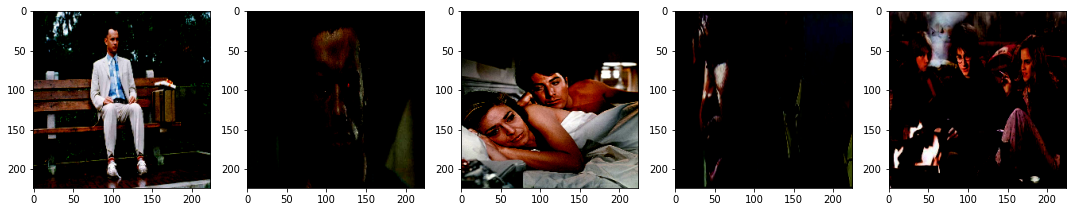

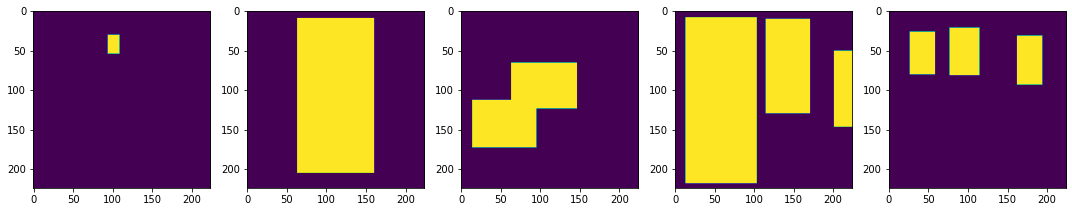

In [21]:
fig = plt.figure(figsize=(15, 15))
a=1
b=5
c = 1
d = 1
for i in range(5):
  plt.subplot(a, b, c)
  plt.imshow(X_train[i])  # Show training images
  c = c + 1
plt.tight_layout() # let's make good plots
plt.show()
fig = plt.figure(figsize=(15, 15))
for i in range(5):
   plt.subplot(a, b, d)
   plt.imshow(y_train[i]) # Show corresponding Mask
   d = d + 1
plt.tight_layout()# let's make good plots
plt.show()

## **Creating a Face Detection Model** 

Here, we will use transfer learning on the pre-trained MobileNetV2 model. Transfer learning is simply the process of using a pre-trained model that has been trained on a dataset for training and predicting on a new given dataset. MobileNet V2 model was developed at Google, pre-trained on the ImageNet dataset with 1.4M images and 1000 classes of web images. We will use this as our base model to train with our dataset to detect faces.

**Initializing the base mode**l

The base model is the model that is pre-trained. We will create a base model using MobileNet V2. We will also initialize the base model with a matching input size as to the pre-processed image data we have which is 160×160. The base model will have the same weights from imagenet. We will exclude the top layers of the pre-trained model by specifying include_top=False which is ideal for feature extraction.

In [22]:
ALPHA = 0.35

IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

HEIGHT_CELLS = 28
WIDTH_CELLS = 28

IMAGE_SIZE = 224

In [23]:
from numpy.core.fromnumeric import shape
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Concatenate, UpSampling2D, Reshape, Input
from tensorflow.keras.layers import Conv2D,Activation, BatchNormalization
from tensorflow.keras.models import Model

from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import Recall, Precision
import tensorflow as tf

### **● Design a face mask detection model.**

Hint: Use U-net along with pre-trained transfer learning models

In [ ]:
inputs=Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3),name="input_image")
encoder = MobileNetV2(input_tensor=inputs, include_top=False, alpha=ALPHA, weights="imagenet")
encoder.summary()

2031616/2019640 [==============================] - 0s 0us/step
Model: "mobilenetv2_0.35_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 16  432         ['input_image[0][0]']            
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 16  64          ['Conv1[0][0]']                  
                

* **MobileNetV2** is a convolutional neural network architecture that seeks to perform well on mobile devices. 
* It is based on an inverted residual structure where the residual connections are between the bottleneck layers. 
* The intermediate expansion layer uses lightweight depthwise convolutions to filter features as a source of non-linearity. 
* As a whole, the architecture of **MobileNetV2** contains the **initial fully convolution layer with 32 filters, followed by 19 residual bottleneck layers.**
* From this base model we will select the layers for skip connections and create upsampled layers.

In [24]:
def create_model():

  inputs=Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3),name="input_image")
  #Pre-trained Encoder
  encoder = MobileNetV2(input_tensor=inputs, include_top=False, alpha=ALPHA, weights="imagenet")
  skip_connection_names = ["input_image", "block_1_expand_relu", "block_3_expand_relu", "block_6_expand_relu"]
  encoder_output =encoder.get_layer("block_13_expand_relu").output

  f=[16, 32, 48, 64]
  x= encoder_output
  for i in range(1,len(skip_connection_names)+1,1):
    x_skip = encoder.get_layer(skip_connection_names[-i]).output
    print(x_skip)
    x = UpSampling2D([2,2])(x)
    x = Concatenate()([x, x_skip])

    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
        
    x = Conv2D(f[-i], (3, 3), padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
        
  x = Conv2D(1, (1, 1), padding="same")(x)
  x = Activation("sigmoid")(x)

  model = Model(inputs,x)
  return model

  # encoder.summary()

In [25]:
model = create_model()
model.summary()

2031616/2019640 [==============================] - 0s 0us/step
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 96), dtype=tf.float32, name=None), name='block_6_expand_relu/Relu6:0', description="created by layer 'block_6_expand_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 56, 56, 48), dtype=tf.float32, name=None), name='block_3_expand_relu/Relu6:0', description="created by layer 'block_3_expand_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 112, 112, 48), dtype=tf.float32, name=None), name='block_1_expand_relu/Relu6:0', description="created by layer 'block_1_expand_relu'")
KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_image'), name='input_image', description="created by layer 'input_image'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputL

## **Design your own Dice Coefficient and Loss function** 

 **Let's define function to compute Dice Coefficient and Cross entropy loss function**

In [26]:
BATCH = 8
EPOCHS = 30
LR= 1e-4

In [27]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tensorflow.keras.backend.epsilon())

In [28]:
from tensorflow.keras.losses import binary_crossentropy

def dice_loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

## **● Train, tune and test the model.**

In [29]:
opt = tensorflow.keras.optimizers.Adam(LR)
metrics=[dice_coefficient, Recall(), Precision()]
model.compile(loss=dice_loss, optimizer=opt, metrics=metrics)

### **Define a Callback function**
The goal of a training is to minimize the loss. With this, the metric to be monitored would be 'loss', and mode would be 'min'. A model.fit() training loop will check at end of every epoch whether the loss is no longer decreasing, considering the min_delta and patience if applicable. Once it's found no longer decreasing, model.stop_training is marked True and the training terminates.

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

callbacks = [ReduceLROnPlateau(monitor='val_loss',factor = 0.1, patience=4),
            EarlyStopping(monitor='val_loss',patience=10, restore_best_weights=False)
            ]

In [31]:
Train_steps=len(X_train) // BATCH
Val_steps=len(X_val) // BATCH

if len(X_train) % BATCH !=0:
  Train_steps +=1

if len(X_val) % BATCH !=0:
  Val_steps +=1

model.fit(
    X_train,y_train,
    validation_data= (X_val,y_val),
    epochs =EPOCHS,
    verbose=1,
    batch_size=BATCH,
    steps_per_epoch=Train_steps,
    validation_steps=Val_steps,
    callbacks=callbacks
) 

Epoch 1/30
41/41 [==============================] - 98s 2s/step - loss: 1.6858 - dice_coefficient: 0.2932 - recall: 0.4793 - precision: 0.4224 - val_loss: 4.1263 - val_dice_coefficient: 0.2379 - val_recall: 1.0000 - val_precision: 0.1326 - lr: 1.0000e-04
Epoch 2/30
41/41 [==============================] - 90s 2s/step - loss: 1.2500 - dice_coefficient: 0.4134 - recall: 0.7733 - precision: 0.5095 - val_loss: 3.5328 - val_dice_coefficient: 0.2678 - val_recall: 0.9947 - val_precision: 0.1648 - lr: 1.0000e-04
Epoch 3/30
41/41 [==============================] - 90s 2s/step - loss: 1.1078 - dice_coefficient: 0.4603 - recall: 0.8219 - precision: 0.5498 - val_loss: 2.3629 - val_dice_coefficient: 0.3262 - val_recall: 0.9772 - val_precision: 0.2552 - lr: 1.0000e-04
Epoch 4/30
41/41 [==============================] - 90s 2s/step - loss: 1.0263 - dice_coefficient: 0.4858 - recall: 0.8195 - precision: 0.5831 - val_loss: 1.6503 - val_dice_coefficient: 0.3915 - val_recall: 0.9311 - val_precision: 0.38

**Thus the model is trained and the trained model has reduced the loss from 1.6 to 0.41, dice coefficient is improved to 0.7401, Recall is almost 90 % and Precision is 86,57%.**

## **● Evaluate the model using testing data.**

 **Evaluating the model**

We are done with training the model. Now, we have to see how well the model has learnt the parameters and how efficiently it can detect the faces.

Let's test the model on test images and check the accuracy of the model.

In [32]:
test_steps = (len(X_test)//BATCH)
if len(X_test) % BATCH != 0:
    test_steps += 1

model.evaluate(X_test, y_test, steps=test_steps)

3/3 [==============================] - 2s 596ms/step - loss: 0.9599 - dice_coefficient: 0.5112 - recall: 0.4962 - precision: 0.7646


[0.9598788022994995,
 0.5111891627311707,
 0.4961622655391693,
 0.7645630240440369]

## **4. Use the “Prediction image” as an input to your designed model and display the output of the image**

 **Predicting an Unseen Image**

Finally, we'll use an image which was not used for training. The model hasn't seen it before. Let's see how the model detects a face if any. We'll do the same image preprocessing steps that we did for training images in order to make it compatible w.r.t MobileNetV2.

**Now let's load the test image for Prediction and predict the mask for detecting face in the image.**

In [33]:
filename = '/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT 2/Part 1Test Data - Prediction Image.jpeg'
unscaled = cv2.imread(filename)
image = cv2.resize(unscaled, (IMAGE_WIDTH, IMAGE_HEIGHT))
scaled_image = tensorflow.keras.applications.mobilenet_v2.preprocess_input(np.array(image, dtype=np.float32))

**Now, let's predict the preprocessed image using the face detection model that we just trained.**

In [34]:
y_pred = model.predict(np.array([scaled_image]))
y_pred

array([[[[0.04894692],
         [0.04815441],
         [0.05692428],
         ...,
         [0.03902274],
         [0.0355275 ],
         [0.04787037]],

        [[0.03567851],
         [0.03750822],
         [0.03908825],
         ...,
         [0.03794771],
         [0.03691244],
         [0.04161534]],

        [[0.03974289],
         [0.03713131],
         [0.04023403],
         ...,
         [0.02948678],
         [0.02776882],
         [0.03173283]],

        ...,

        [[0.0465562 ],
         [0.0445523 ],
         [0.05014685],
         ...,
         [0.04180783],
         [0.04724616],
         [0.0570814 ]],

        [[0.04652396],
         [0.05854467],
         [0.05963713],
         ...,
         [0.04571709],
         [0.05972824],
         [0.07346511]],

        [[0.05988199],
         [0.06486154],
         [0.06897816],
         ...,
         [0.06477278],
         [0.07388201],
         [0.09593302]]]], dtype=float32)

In [35]:
pred_mask = cv2.resize((1.0*(y_pred[0] > 0.5)), (IMAGE_WIDTH,IMAGE_HEIGHT))

**Viewing the predicted image and its face-detected output**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


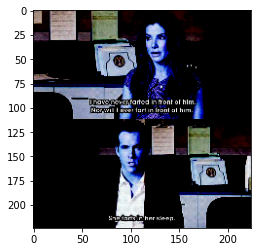

In [38]:
plt.imshow(scaled_image)

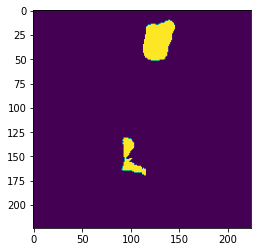

In [39]:
plt.imshow(pred_mask)

## **The model is able to detect two faces in the image correctly.**

# **PART 2: PROJECT BASED** (30 Marks)

• **DOMAIN:** Face recognition

• **CONTEXT:** 

Company X intends to build a face identi!ication model to recognise human faces.

**• DATA DESCRIPTION:** 

The dataset comprises of images and its mask where there is a human face.

• **PROJECT OBJECTIVE:** 

Face Aligned Face Dataset from Pinterest. This dataset contains 10,770 images for 100 people. All images are taken
from 'Pinterest' and aligned using dlib library. Some data samples:

• **TASK:** 

In this problem, we use a pre-trained model trained on Face recognition to recognise similar faces. Here, we are particularly interested in recognising whether two given faces are of the same person or not. Below are the steps involved in the project.

• Load the dataset and create the metadata.

• Check some samples of metadata.

• Load the pre-trained model and weights.

• Generate Embedding vectors for each face in the dataset.

• Build distance metrics for identifying the distance between two given images.

• Use PCA for dimensionality reduction.

• Build an SVM classi!ier in order to map each image to its right person.

• Import the the test image. Display the image. Use the SVM trained model to predict the face.

## **• Load the dataset and create the metadata.**
Change current working directory to project folder. [ Score: 2 points ]

In [40]:
path = "/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT 2/Aligned+Face+Dataset+from+Pinterest+-+CV+project+1.zip"

Extract the zip file [ Score: 2 points ]

Extract Aligned Face Dataset from Pinterest.zip

In [41]:
from zipfile import ZipFile

with ZipFile (path,'r') as z:
  z.extractall() 
print("Training zip extraction done!")

Training zip extraction done!


## **Function to load images**

* Define a function to load the images from the extracted folder and map each image with person id

In [42]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

## Define function to load image

* Define a function to load image from the metadata

In [43]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    
    return img[...,::-1]

## • **Check some samples of metadata.**

### Load a sample image [ Score: 2 points ]

Load one image using the function "load_image"

In [46]:
sample_image =load_image('/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT 2/PINS/pins_taylor swift/taylor swift97.jpg')

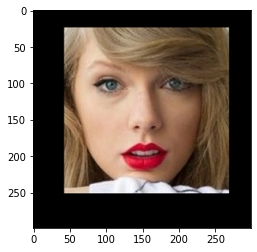

In [47]:
import matplotlib.pyplot as plt

plt.imshow(sample_image)

## **• Load the pre-trained model and weights.**
### VGG Face model

Here we are giving you the predefined model for VGG face

The VGGFace refers to a series of models developed for face recognition and demonstrated on benchmark computer vision datasets by members of the Visual Geometry Group (VGG) at the University of Oxford.

**VGGFace Model**
The VGGFace model, named later, was described by Omkar Parkhi in the 2015 paper titled “Deep Face Recognition.”

A contribution of the paper was a description of how to develop a very large training dataset, required to train modern-convolutional-neural-network-based face recognition systems, to compete with the large datasets used to train models at Facebook and Google.

This dataset is then used as the basis for developing deep CNNs for face recognition tasks such as face identification and verification. Specifically, models are trained on the very large dataset, then evaluated on benchmark face recognition datasets, demonstrating that the model is effective at generating generalized features from faces.

They describe the process of training a face classifier first that uses a softmax activation function in the output layer to classify faces as people. This layer is then removed so that the output of the network is a vector feature representation of the face, called a face embedding. The model is then further trained, via fine-tuning, in order that the Euclidean distance between vectors generated for the same identity are made smaller and the vectors generated for different identities is made larger. This is achieved using a triplet loss function.

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

## Load the model [ Score: 2 points ]
Load the model defined above
Then load the given weight file named "vgg_face_weights.h5"

In [49]:
model = vgg_face()
pretrained_weights = "/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT 2/vgg_face_weights.h5"

Let's check first and second last layer of the model to understand the model structure.

In [50]:
model.layers[0], model.layers[-2]

(<keras.layers.convolutional.ZeroPadding2D at 0x7fd399cdb710>,
 <keras.layers.core.flatten.Flatten at 0x7fd399bfd990>)

## Get vgg_face_descriptor

In [51]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [52]:
type(vgg_face_descriptor)

keras.engine.functional.Functional

In [53]:
vgg_face_descriptor.inputs, vgg_face_descriptor.outputs

([<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'zero_padding2d_input')>],
 [<KerasTensor: shape=(None, 2622) dtype=float32 (created by layer 'flatten')>])

## **• Generate Embedding vectors for each face in the dataset.**
### Generate embeddings for each image in the dataset
Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model.

In [56]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


## Generate embeddings for all images [ Score: 3 points ]
Write code to iterate through metadata and create embeddings for each image using vgg_face_descriptor.predict() and store in a list with name embeddings

If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [57]:
embeddings = np.zeros((metadata.shape[0], 2622))

for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    embeddings[i]=embedding_vector

In [58]:
print("Shape of Embedding Vector: ",embeddings.shape)

Shape of Embedding Vector:  (10770, 2622)


In [59]:
embeddings[0], embeddings[988], embeddings[988].shape

(array([-9.75050149e-04, -2.07876190e-04, -4.27250634e-05, ...,
         3.50395276e-04, -1.81128140e-04,  5.24284318e-04]),
 array([-6.75924355e-04, -6.33854579e-05,  3.84444647e-05, ...,
         4.19336866e-04, -2.49842094e-04,  3.01604829e-04]),
 (2622,))

## **• Build distance metrics for identifying the distance between two given images.**

### Function to calculate distance between given 2 pairs of images.
Consider distance metric as "Squared L2 distance"

Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [60]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

## Plot images and get distance between the pairs given below
2, 3 and 2, 180
30, 31 and 30, 100
70, 72 and 70, 115

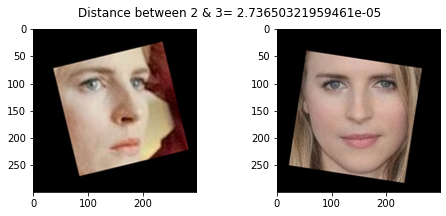

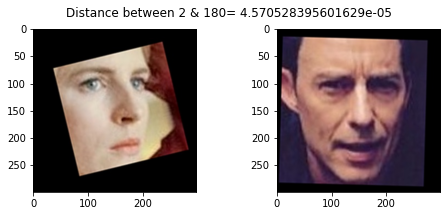

In [61]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance between {idx1} & {idx2}= {distance(embeddings[idx1], embeddings[idx2]):}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

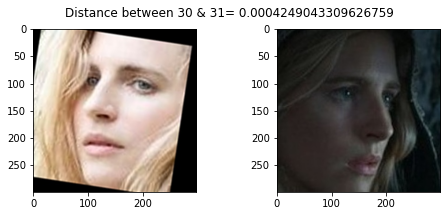

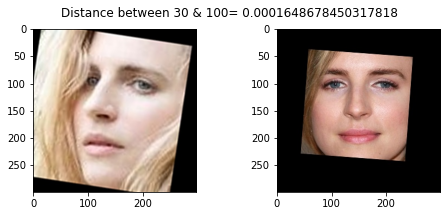

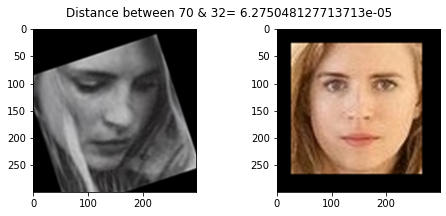

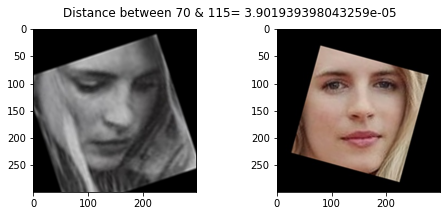

In [62]:
show_pair(30, 31)
show_pair(30, 100)
show_pair(70, 32)
show_pair(70, 115)

## **Create train and test sets** [ Score: 2 points ]
Create X_train, X_test and y_train, y_test

Use train_idx to seperate out training features and labels

Use test_idx to seperate out testing features and labels

In [63]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0     #every 9th example goes in test data and rest go in train data
test_idx = np.arange(metadata.shape[0]) % 9 == 0

# one half as train examples of 10 identities
X_train = embeddings[train_idx]
# another half as test examples of 10 identities
X_test = embeddings[test_idx]

targets = np.array([m.name for m in metadata])

#train labels
y_train = targets[train_idx]
#test labels
y_test = targets[test_idx]

In [64]:
print('X_train shape : ({0},{1})'.format(X_train.shape[0], X_train.shape[1]))
print('y_train shape : ({0},)'.format(y_train.shape[0]))
print('X_test shape : ({0},{1})'.format(X_test.shape[0], X_test.shape[1]))
print('y_test shape : ({0},)'.format(y_test.shape[0]))

X_train shape : (9573,2622)
y_train shape : (9573,)
X_test shape : (1197,2622)
y_test shape : (1197,)


## **Encode the Labels** [ Score: 2 points ]
Encode the targets

Use LabelEncoder

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [66]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['pins_Aaron Paul' 'pins_Alvaro Morte' 'pins_Amanda Crew'
 'pins_Amaury Nolasco' 'pins_Anna Gunn' 'pins_Benedict Cumberbatch'
 'pins_Betsy Brandt' 'pins_Brenton Thwaites' 'pins_Brit Marling'
 'pins_Bryan Cranston' 'pins_Caity Lotz' 'pins_Cameron Monaghan'
 'pins_Chance Perdomo' 'pins_Chris Evans' 'pins_Chris Pratt'
 'pins_Cobie Smulders' 'pins_Danielle Panabaker' 'pins_Dave Franco'
 'pins_Dominic Purcell' 'pins_Dwayne Johnson' 'pins_Emilia Clarke'
 'pins_Emily Bett Rickards' 'pins_Emma Stone' 'pins_Gwyneth Paltrow'
 'pins_Henry Cavil' 'pins_Jason Momoa' 'pins_Jeremy Renner'
 'pins_Jesse Eisenberg' 'pins_Jim Parsons' 'pins_Jon Bernthal'
 'pins_Josh Radnor' 'pins_Kit Harington' 'pins_Krysten Ritter'
 'pins_Kumail Nanjiani' 'pins_Maisie Williams' 'pins_Mark Ruffalo'
 'pins_Martin Starr' 'pins_Melissa benoit' 'pins_Mike Colter'
 'pins_Morena Baccarin' 'pins_Morgan Freeman' 'pins_Natalie Portman '
 'pins_Neil Patrick Harris' 'pins_Paul Rudd' 'pins_Pedro Alonso'
 'pins_Peter Dinklage' 'pins_

In [67]:
print('y_train_encoded : ', y_train_encoded)
print('y_test_encoded : ', y_test_encoded)

y_train_encoded :  [ 8  8  8 ... 16 16 16]
y_test_encoded :  [ 8  8  8 ... 16 16 16]


## **Standardize the feature values** [ Score: 2 points ]
Scale the features using StandardScaler


In [68]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

In [69]:
X_test_std = scaler.transform(X_test)

In [70]:
print('X_train_std shape : ({0},{1})'.format(X_train_std.shape[0], X_train_std.shape[1]))
print('y_train_encoded shape : ({0},)'.format(y_train_encoded.shape[0]))
print('X_test_std shape : ({0},{1})'.format(X_test_std.shape[0], X_test_std.shape[1]))
print('y_test_encoded shape : ({0},)'.format(y_test_encoded.shape[0]))

X_train_std shape : (9573,2622)
y_train_encoded shape : (9573,)
X_test_std shape : (1197,2622)
y_test_encoded shape : (1197,)


## **• Use PCA for dimensionality reduction.**

### Reduce dimensions using PCA (3 marks)

Reduce feature dimensions using Principal Component Analysis

Set the parameter n_components=128

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

## **• Build an SVM classifier in order to map each image to its right person.**
### Build a Classifier (3 marks)
Use SVM Classifier to predict the person in the given image

Fit the classifier and print the score

In [72]:
from sklearn.svm import SVC

clf = SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [73]:
y_predict = clf.predict(X_test_pca)

In [74]:
y_predict_encoded = le.inverse_transform(y_predict)

In [75]:
print('y_predict : ',y_predict)
print('y_test_encoded : ',y_test_encoded)

y_predict :  [ 8 37 48 ... 16 34  2]
y_test_encoded :  [ 8  8  8 ... 16 16 16]


In [76]:
y_test_encoded[32:49]

array([10, 10, 10, 10, 10, 10, 10, 44, 44, 44, 44, 44, 44, 44, 44, 13, 13])

## **Test results (2 marks)**
Take 10th image from test set and plot the image

Report to which person(folder name in dataset) the image belongs to

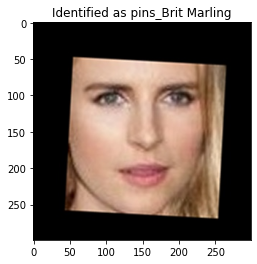

In [78]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_predict[example_idx]
example_identity = y_predict_encoded[example_idx]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');

## **• Import the the test image. Display the image. Use the SVM trained model to predict the face.**

In [174]:
Test_image_1=load_image('/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT 2/Part 2 - Test Image - Dwayne Johnson4.jpg')
Test_image_2=load_image('/content/drive/MyDrive/AIML-GL/Computer Vision/CV PROJECT 2/Part 2- Test Image - Benedict Cumberbatch9.jpg')

In [175]:
Test_image_1 = (Test_image_1 / 255.).astype(np.float32)
Test_image_1 = cv2.resize(Test_image_1, dsize = (224,224))
Test_image_2 = (Test_image_2 / 255.).astype(np.float32)
Test_image_2 = cv2.resize(Test_image_2, dsize = (224,224))
print(Test_image_1.shape)
print(Test_image_2.shape)

(224, 224, 3)
(224, 224, 3)


In [176]:
embeddings1 = np.zeros((1, 2622))
embeddings2 = np.zeros((1, 2622))

In [177]:
embedding_vector1 = vgg_face_descriptor.predict(np.expand_dims(Test_image_1, axis=0))[0]
embeddings1[0]= embedding_vector1
embedding_vector2 = vgg_face_descriptor.predict(np.expand_dims(Test_image_2, axis=0))[0]
embeddings2[0]= embedding_vector2
print(embedding_vector1.shape)
print(embedding_vector2.shape)

(2622,)
(2622,)


In [178]:
first_image = embeddings1
second_image = embeddings2

In [179]:
X_test_1 = scaler.transform(first_image)
X_test_2 = scaler.transform(second_image)

In [180]:
X_test_pca_1 = pca.transform(X_test_1)
X_test_pca_2 = pca.transform(X_test_2)

In [181]:
X_test_pca_1.shape
X_test_pca_2.shape

(1, 128)

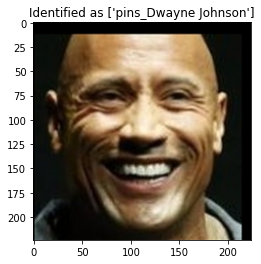

In [182]:
y_predict_1 = clf.predict(X_test_pca_1)
y_predict_encoded_1 = le.inverse_transform(y_predict_1)

plt.imshow(Test_image_1)
plt.title(f'Identified as {y_predict_encoded_1}');

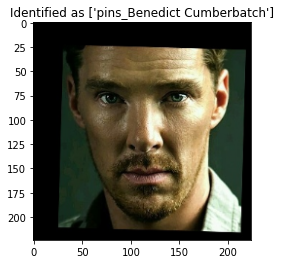

In [183]:
y_predict_2 = clf.predict(X_test_pca_2)
y_predict_encoded_2 = le.inverse_transform(y_predict_2)

plt.imshow(Test_image_2)
plt.title(f'Identified as {y_predict_encoded_2}');

## **MODEL FEATURES**

* Squared L2 distance was used to calculate the distance between 2 pairs of images.
* Encoding the target variables, standardizing the features and reducing dimensions using PCA.
* SVM classifier is used to predict the celebrity with 96.455% accuracy.

**Thus we can see from the test images that model is performing well on unseen data and correctly predicted the 2 celebrity images as "Dwayne Johnson" and " Benedict Cumberbatch"** 

## ---------------**END** ----------